In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/train.csv')
test_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/test.csv')
sub_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/sample_submission.csv')

In [3]:
train_df.shape,test_df.shape

((233154, 41), (112392, 40))

In [4]:
train_df['is_train'] = ''
test_df['is_train'] = ''
data = pd.DataFrame()
train_df.loc[:,'is_train'] = 1
test_df.loc[:,'is_train'] = 0
data = data.append(train_df,sort=False).append(test_df,sort=False)

In [5]:
data.reset_index(inplace=True)

In [6]:
#Treat missing values
#86 % values are no so it is safe to impute NO
data['Employment.Type'].fillna('Self employed',inplace=True)

In [7]:
data.apply(lambda x: sum(x.isnull()),axis=0)

index                                       0
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION     

In [8]:
data.shape,train_df.shape,test_df.shape

((345546, 43), (233154, 42), (112392, 41))

In [9]:
#create mean and st dev features- leakage features
ft_name = ['loan_default']
var = ['branch_id','State_ID']
fntouse = list([np.mean,np.sum])

# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for fn2use in fntouse:
        for var_name in var:
            temp3 = train_df.pivot_table(values=ftname,index=[var_name],aggfunc=fn2use)
            # temp2.plot(kind='bar')
            temp3.reset_index(inplace=True)
            temp3.columns = [var_name, var_name+'_'+ftname+'_'+str(fn2use).split(' ')[1]]
            data = data.merge(temp3,on=var_name, how = 'left')
    #         data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

            # df = pd.concat([temp2,temp3],axis=1)

In [10]:
data.apply(lambda x: sum(x.isnull()),axis=0)

index                                       0
UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION     

In [11]:
data.columns

Index(['index', 'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'is_train', 'branch_id_loan_default_mean',
       'State_ID_loan_default_mean', 'branch

In [12]:
data['CREDIT.HISTORY.LENGTH.YEARS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[0][:-3]))

In [13]:
data['CREDIT.HISTORY.LENGTH.MONTHS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[1][:-3]))

In [14]:
data['CREDIT.HISTORY.LENGTH.TOTMONS'] = data['CREDIT.HISTORY.LENGTH.MONTHS'] + np.dot(data['CREDIT.HISTORY.LENGTH.YEARS'],12)

In [15]:
data['AVERAGE.ACCT.AGE.YEARS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[0][:-3]))

data['AVERAGE.ACCT.AGE.MONTHS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[1][:-3]))

data['AVERAGE.ACCT.AGE.TOTMONS'] = data['AVERAGE.ACCT.AGE.MONTHS'] + np.dot(data['AVERAGE.ACCT.AGE.YEARS'],12)

In [16]:
data['Date.of.Birth'][0]

'01-01-84'

In [17]:
data['Date.of.Birth.YEAR'] = data['Date.of.Birth'].map(lambda x : int(x.split('-')[2]))

In [18]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth'].head()

874     16-07-00
1300    05-03-00
1864    01-01-00
1872    18-08-00
1874    01-01-00
Name: Date.of.Birth, dtype: object

In [19]:
data['Date.of.Birth.YEAR.conv'] = ''

In [20]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth.YEAR.conv'] = 2000

In [21]:
data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR.conv'] = data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR']+1900

In [22]:
data['Date.of.Birth.AGE'] = ''

data['Date.of.Birth.AGE'] = 2019 - data.loc[:,'Date.of.Birth.YEAR.conv']

In [23]:
#st dev and mean of ltv feature

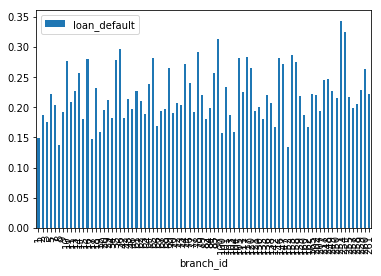

In [24]:
temp2 = data.pivot_table(values='loan_default',index=['branch_id'],aggfunc=np.mean)
# print('Frequency Table for Credit History:') 
# print(temp2)

# fig = plt.figure(figsize=(8,4))
# ax1 = fig.add_subplot(121)
# ax1.set_xlabel('Credit_History')
# ax1.set_ylabel('Count of Applicants')
# ax1.set_title("Applicants by Credit_History")
temp2.plot(kind='bar')



In [25]:
#create mean and st dev features


ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT']


#All 208 features - aggregated

# ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
#            'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
#        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
#        'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
#        'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
#        'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
#        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',]


    
var = ['Current_pincode_ID','branch_id','supplier_id','manufacturer_id','State_ID','Employee_code_ID']
# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for var_name in var:
        temp3 = data.pivot_table(values=ftname,index=[var_name],aggfunc=np.mean)
        # temp2.plot(kind='bar')
        temp3.reset_index(inplace=True)
        temp3.columns = [var_name, var_name+'_'+ftname+'_mean']
        data = data.merge(temp3,on=var_name, how = 'left')
        data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

        # df = pd.concat([temp2,temp3],axis=1)

In [26]:
# data = data.merge(temp3,on='Current_pincode_ID', how = 'left')

In [27]:
# data['ltv_stdev'] = data['ltv']-data['ltv_mean']

In [28]:
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace(' ', '_', regex=True)

In [29]:
#treat categorical variables
from sklearn.preprocessing import OneHotEncoder

d = pd.DataFrame()

var_mod = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

x = pd.get_dummies(data[var_mod])

data  = data.drop(var_mod,axis=1)
data = pd.concat([data,x], axis=1)
    
# for i in var_mod:
#     print(i)
# #     d[str(i)] 
#     dd = le.fit_transform(data.loc[:,i]).toarray()
#     print(dd.shape)
# d.dtypes


In [30]:
data.shape

(345546, 112)

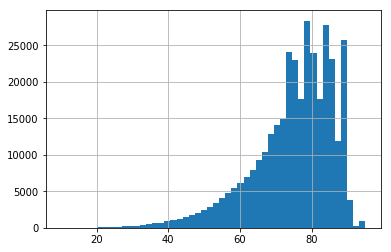

In [31]:
data['ltv'].hist(bins=50)
plt.show()

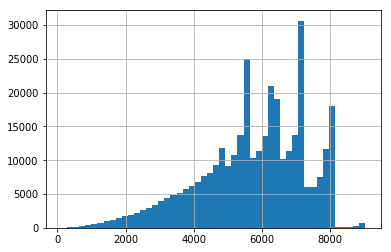

In [32]:
(data['ltv']**2).hist(bins=50)
plt.show()

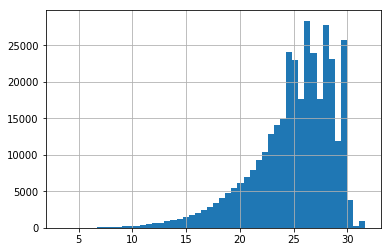

In [33]:
(data['ltv']**1/3).hist(bins=50)
plt.show()

In [34]:
data['log_disbursed_amount'] = np.log(data['disbursed_amount'])
data['log_asset_cost'] = np.log(data['asset_cost'])

In [35]:
data['ltv_squared'] = data['ltv']**2
data['log_ltv'] = np.log(data['ltv'])

In [36]:
data['DisbursalDate_month'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[1]))
data['DisbursalDate_dayofmonth'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[0]))

In [37]:
type(data['AVERAGE.ACCT.AGE'][0])

str

In [38]:
type(data['CREDIT.HISTORY.LENGTH'][0])

str

In [39]:
train_df = data.loc[data['is_train']==1,:]
train_df = train_df.drop(['is_train'],axis=1)

In [40]:
test_df = data.loc[data['is_train']==0,:]
test_df = test_df.drop(['is_train','loan_default'],axis=1)

In [41]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

index                                                                                    0
UniqueID                                                                                 0
disbursed_amount                                                                         0
asset_cost                                                                               0
ltv                                                                                      0
branch_id                                                                                0
supplier_id                                                                              0
manufacturer_id                                                                          0
Current_pincode_ID                                                                       0
Date.of.Birth                                                                            0
DisbursalDate                                                                            0

In [42]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

index                                                                                    0
UniqueID                                                                                 0
disbursed_amount                                                                         0
asset_cost                                                                               0
ltv                                                                                      0
branch_id                                                                                0
supplier_id                                                                              0
manufacturer_id                                                                          0
Current_pincode_ID                                                                       0
Date.of.Birth                                                                            0
DisbursalDate                                                                            0

In [43]:
train_df.shape,test_df.shape

((233154, 117), (112392, 116))

In [44]:
list(train_df.columns)

['index',
 'UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Date.of.Birth',
 'DisbursalDate',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'loan_default',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 

In [45]:
# predictors = [
#  'disbursed_amount',
#  'asset_cost',
#  'ltv',
#  'branch_id',
#  'supplier_id',
#  'manufacturer_id',
#  'Current_pincode_ID',
#  'State_ID',
#  'Employee_code_ID',
#  'MobileNo_Avl_Flag',
#  'Aadhar_flag',
#  'PAN_flag',
#  'VoterID_flag',
#  'Driving_flag',
#  'Passport_flag',
#  'PERFORM_CNS.SCORE',
#  'PRI.NO.OF.ACCTS',
#  'PRI.ACTIVE.ACCTS',
#  'PRI.OVERDUE.ACCTS',
#  'PRI.CURRENT.BALANCE',
#  'PRI.SANCTIONED.AMOUNT',
#  'PRI.DISBURSED.AMOUNT',
#  'SEC.NO.OF.ACCTS',
#  'SEC.ACTIVE.ACCTS',
#  'SEC.OVERDUE.ACCTS',
#  'SEC.CURRENT.BALANCE',
#  'SEC.SANCTIONED.AMOUNT',
#  'SEC.DISBURSED.AMOUNT',
#  'PRIMARY.INSTAL.AMT',
#  'SEC.INSTAL.AMT',
#  'NEW.ACCTS.IN.LAST.SIX.MONTHS',
#  'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
#  'NO.OF_INQUIRIES',
#  'branch_id_loan_default_mean',
#  'State_ID_loan_default_mean',
#  'branch_id_loan_default_sum',
#  'State_ID_loan_default_sum',
#  'CREDIT.HISTORY.LENGTH.YEARS',
#  'CREDIT.HISTORY.LENGTH.MONTHS',
#  'CREDIT.HISTORY.LENGTH.TOTMONS',
#  'AVERAGE.ACCT.AGE.YEARS',
#  'AVERAGE.ACCT.AGE.MONTHS',
#  'AVERAGE.ACCT.AGE.TOTMONS',
#  'Date.of.Birth.YEAR',
#  'Date.of.Birth.YEAR.conv',
#  'Date.of.Birth.AGE',
#  'Current_pincode_ID_disbursed_amount_mean',
#  'Current_pincode_ID_stdev',
#  'branch_id_disbursed_amount_mean',
#  'branch_id_stdev',
#  'supplier_id_disbursed_amount_mean',
#  'supplier_id_stdev',
#  'manufacturer_id_disbursed_amount_mean',
#  'manufacturer_id_stdev',
#  'State_ID_disbursed_amount_mean',
#  'State_ID_stdev',
#  'Employee_code_ID_disbursed_amount_mean',
#  'Employee_code_ID_stdev',
#  'Current_pincode_ID_asset_cost_mean',
#  'branch_id_asset_cost_mean',
#  'supplier_id_asset_cost_mean',
#  'manufacturer_id_asset_cost_mean',
#  'State_ID_asset_cost_mean',
#  'Employee_code_ID_asset_cost_mean',
#  'Current_pincode_ID_ltv_mean',
#  'branch_id_ltv_mean',
#  'supplier_id_ltv_mean',
#  'manufacturer_id_ltv_mean',
#  'State_ID_ltv_mean',
#  'Employee_code_ID_ltv_mean',
#  'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
#  'branch_id_PERFORM_CNS.SCORE_mean',
#  'supplier_id_PERFORM_CNS.SCORE_mean',
#  'manufacturer_id_PERFORM_CNS.SCORE_mean',
#  'State_ID_PERFORM_CNS.SCORE_mean',
#  'Employee_code_ID_PERFORM_CNS.SCORE_mean',
#  'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
#  'branch_id_PRIMARY.INSTAL.AMT_mean',
#  'supplier_id_PRIMARY.INSTAL.AMT_mean',
#  'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
#  'State_ID_PRIMARY.INSTAL.AMT_mean',
#  'Employee_code_ID_PRIMARY.INSTAL.AMT_mean',
#  'Current_pincode_ID_PRI.NO.OF.ACCTS_mean',
#  'branch_id_PRI.NO.OF.ACCTS_mean',
#  'supplier_id_PRI.NO.OF.ACCTS_mean',
#  'manufacturer_id_PRI.NO.OF.ACCTS_mean',
#  'State_ID_PRI.NO.OF.ACCTS_mean',
#  'Employee_code_ID_PRI.NO.OF.ACCTS_mean',
#  'Current_pincode_ID_PRI.ACTIVE.ACCTS_mean',
#  'branch_id_PRI.ACTIVE.ACCTS_mean',
#  'supplier_id_PRI.ACTIVE.ACCTS_mean',
#  'manufacturer_id_PRI.ACTIVE.ACCTS_mean',
#  'State_ID_PRI.ACTIVE.ACCTS_mean',
#  'Employee_code_ID_PRI.ACTIVE.ACCTS_mean',
#  'Current_pincode_ID_PRI.OVERDUE.ACCTS_mean',
#  'branch_id_PRI.OVERDUE.ACCTS_mean',
#  'supplier_id_PRI.OVERDUE.ACCTS_mean',
#  'manufacturer_id_PRI.OVERDUE.ACCTS_mean',
#  'State_ID_PRI.OVERDUE.ACCTS_mean',
#  'Employee_code_ID_PRI.OVERDUE.ACCTS_mean',
#  'Current_pincode_ID_PRI.CURRENT.BALANCE_mean',
#  'branch_id_PRI.CURRENT.BALANCE_mean',
#  'supplier_id_PRI.CURRENT.BALANCE_mean',
#  'manufacturer_id_PRI.CURRENT.BALANCE_mean',
#  'State_ID_PRI.CURRENT.BALANCE_mean',
#  'Employee_code_ID_PRI.CURRENT.BALANCE_mean',
#  'Current_pincode_ID_PRI.SANCTIONED.AMOUNT_mean',
#  'branch_id_PRI.SANCTIONED.AMOUNT_mean',
#  'supplier_id_PRI.SANCTIONED.AMOUNT_mean',
#  'manufacturer_id_PRI.SANCTIONED.AMOUNT_mean',
#  'State_ID_PRI.SANCTIONED.AMOUNT_mean',
#  'Employee_code_ID_PRI.SANCTIONED.AMOUNT_mean',
#  'Current_pincode_ID_PRI.DISBURSED.AMOUNT_mean',
#  'branch_id_PRI.DISBURSED.AMOUNT_mean',
#  'supplier_id_PRI.DISBURSED.AMOUNT_mean',
#  'manufacturer_id_PRI.DISBURSED.AMOUNT_mean',
#  'State_ID_PRI.DISBURSED.AMOUNT_mean',
#  'Employee_code_ID_PRI.DISBURSED.AMOUNT_mean',
#  'Current_pincode_ID_SEC.NO.OF.ACCTS_mean',
#  'branch_id_SEC.NO.OF.ACCTS_mean',
#  'supplier_id_SEC.NO.OF.ACCTS_mean',
#  'manufacturer_id_SEC.NO.OF.ACCTS_mean',
#  'State_ID_SEC.NO.OF.ACCTS_mean',
#  'Employee_code_ID_SEC.NO.OF.ACCTS_mean',
#  'Current_pincode_ID_SEC.ACTIVE.ACCTS_mean',
#  'branch_id_SEC.ACTIVE.ACCTS_mean',
#  'supplier_id_SEC.ACTIVE.ACCTS_mean',
#  'manufacturer_id_SEC.ACTIVE.ACCTS_mean',
#  'State_ID_SEC.ACTIVE.ACCTS_mean',
#  'Employee_code_ID_SEC.ACTIVE.ACCTS_mean',
#  'Current_pincode_ID_SEC.OVERDUE.ACCTS_mean',
#  'branch_id_SEC.OVERDUE.ACCTS_mean',
#  'supplier_id_SEC.OVERDUE.ACCTS_mean',
#  'manufacturer_id_SEC.OVERDUE.ACCTS_mean',
#  'State_ID_SEC.OVERDUE.ACCTS_mean',
#  'Employee_code_ID_SEC.OVERDUE.ACCTS_mean',
#  'Current_pincode_ID_SEC.CURRENT.BALANCE_mean',
#  'branch_id_SEC.CURRENT.BALANCE_mean',
#  'supplier_id_SEC.CURRENT.BALANCE_mean',
#  'manufacturer_id_SEC.CURRENT.BALANCE_mean',
#  'State_ID_SEC.CURRENT.BALANCE_mean',
#  'Employee_code_ID_SEC.CURRENT.BALANCE_mean',
#  'Current_pincode_ID_SEC.SANCTIONED.AMOUNT_mean',
#  'branch_id_SEC.SANCTIONED.AMOUNT_mean',
#  'supplier_id_SEC.SANCTIONED.AMOUNT_mean',
#  'manufacturer_id_SEC.SANCTIONED.AMOUNT_mean',
#  'State_ID_SEC.SANCTIONED.AMOUNT_mean',
#  'Employee_code_ID_SEC.SANCTIONED.AMOUNT_mean',
#  'Current_pincode_ID_SEC.DISBURSED.AMOUNT_mean',
#  'branch_id_SEC.DISBURSED.AMOUNT_mean',
#  'supplier_id_SEC.DISBURSED.AMOUNT_mean',
#  'manufacturer_id_SEC.DISBURSED.AMOUNT_mean',
#  'State_ID_SEC.DISBURSED.AMOUNT_mean',
#  'Employee_code_ID_SEC.DISBURSED.AMOUNT_mean',
#  'Current_pincode_ID_SEC.INSTAL.AMT_mean',
#  'branch_id_SEC.INSTAL.AMT_mean',
#  'supplier_id_SEC.INSTAL.AMT_mean',
#  'manufacturer_id_SEC.INSTAL.AMT_mean',
#  'State_ID_SEC.INSTAL.AMT_mean',
#  'Employee_code_ID_SEC.INSTAL.AMT_mean',
#  'Current_pincode_ID_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'branch_id_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'supplier_id_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'manufacturer_id_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'State_ID_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'Employee_code_ID_NEW.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'Current_pincode_ID_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'branch_id_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'supplier_id_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'manufacturer_id_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'State_ID_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'Employee_code_ID_DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS_mean',
#  'Employment.Type_Salaried',
#  'Employment.Type_Self employed',
#  'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
#  'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
#  'log_disbursed_amount',
#  'log_asset_cost',
#  'ltv_squared',
#  'DisbursalDate_month',
#  'DisbursalDate_dayofmonth'
#              ]

In [46]:

##Single best model predictors



predictors = ['disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'CREDIT.HISTORY.LENGTH.YEARS', 'CREDIT.HISTORY.LENGTH.MONTHS',
       'CREDIT.HISTORY.LENGTH.TOTMONS', 'AVERAGE.ACCT.AGE.YEARS',
       'AVERAGE.ACCT.AGE.MONTHS', 'AVERAGE.ACCT.AGE.TOTMONS',
       'Date.of.Birth.YEAR', 'Date.of.Birth.YEAR.conv', 'Date.of.Birth.AGE',
       'Employment.Type_Salaried', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
       'log_disbursed_amount', 'log_asset_cost', 'DisbursalDate_month',
       'DisbursalDate_dayofmonth','Current_pincode_ID_disbursed_amount_mean',
 'Current_pincode_ID_stdev',
 'branch_id_disbursed_amount_mean',
 'branch_id_stdev',
 'supplier_id_disbursed_amount_mean',
 'supplier_id_stdev',
 'manufacturer_id_disbursed_amount_mean',
 'manufacturer_id_stdev',
 'State_ID_disbursed_amount_mean',
 'State_ID_stdev',
 'Employee_code_ID_disbursed_amount_mean',
 'Employee_code_ID_stdev',
 'Current_pincode_ID_asset_cost_mean',
 'branch_id_asset_cost_mean',
 'supplier_id_asset_cost_mean',
 'manufacturer_id_asset_cost_mean',
 'State_ID_asset_cost_mean',
 'Employee_code_ID_asset_cost_mean',
 'Current_pincode_ID_ltv_mean',
 'branch_id_ltv_mean',
 'supplier_id_ltv_mean',
 'manufacturer_id_ltv_mean',
 'State_ID_ltv_mean',
 'Employee_code_ID_ltv_mean',
 'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
 'branch_id_PERFORM_CNS.SCORE_mean',
 'supplier_id_PERFORM_CNS.SCORE_mean',
 'manufacturer_id_PERFORM_CNS.SCORE_mean',
 'State_ID_PERFORM_CNS.SCORE_mean',
 'Employee_code_ID_PERFORM_CNS.SCORE_mean',
 'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
 'branch_id_PRIMARY.INSTAL.AMT_mean',
 'supplier_id_PRIMARY.INSTAL.AMT_mean',
 'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
 'State_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_PRIMARY.INSTAL.AMT_mean','branch_id_loan_default_mean',
       'State_ID_loan_default_mean', 'branch_id_loan_default_sum',
       'State_ID_loan_default_sum','ltv_squared','log_ltv']


outcome = ['loan_default']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df[predictors], train_df[outcome], test_size=0.3, random_state=1234)

In [48]:
X_train.shape,X_validation.shape

((163207, 110), (69947, 110))

In [49]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [50]:

alg = XGBClassifier()

In [ ]:
#kf = loo.split(X_train_std[predictor_var])
kf = KFold(n_splits=10).split(X_train[['State_ID','branch_id']])
# ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID']
error = []
# yavg = pd.DataFrame()

for train, test in kf:
    # Filter training data
    print("training stared")
    train_predictors = X_train[predictors].iloc[train,:]

    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train].values

    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    y1 = alg.predict(X_train[predictors].iloc[test,:])
#     yavg = yavg.append(pd.Series(y1),ignore_index=True)

    #Record error from each cross-validation run
    error.append(metrics.roc_auc_score(y_train.iloc[test], y1))
    print('score for current fold',metrics.roc_auc_score(y_train.iloc[test], y1))
    print("training finished")
print ("Cross-Validation AUC Score : %f" % np.mean(error))


In [50]:
def modelfit(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
    sub_df['loan_default']= dtrain_predprob1
    sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
  

In [51]:
def modelfit_mod(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
#     sub_df['loan_default']= dtrain_predprob1
#     sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')  
  

In [72]:
%%time
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

AttributeError: 'XGBClassifier' object has no attribute 'DMatrix'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = 5)

modelfit_mod(model6, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=29, learning_rate=0.1, random_state=0)

modelfit_mod(ada, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time

from sklearn.ensemble import VotingClassifier

model9 = VotingClassifier(estimators=[('RF', model6),('Xgb', XGBClassifier()), ('adaboost', ada)], voting='soft')

modelfit_mod(model9, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [55]:
model1 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

[0]	train-auc:0.629527+0.00182547	test-auc:0.621523+0.0017791
[1]	train-auc:0.641806+0.00214953	test-auc:0.634012+0.00154621
[2]	train-auc:0.647278+0.0023821	test-auc:0.63795+0.00161221
[3]	train-auc:0.651252+0.00219846	test-auc:0.640654+0.0018581
[4]	train-auc:0.654388+0.00183708	test-auc:0.643445+0.0014865
[5]	train-auc:0.657016+0.00141711	test-auc:0.64561+0.00144591
[6]	train-auc:0.659434+0.000736005	test-auc:0.647198+0.0012389
[7]	train-auc:0.661819+0.000855405	test-auc:0.648904+0.00140562
[8]	train-auc:0.664099+0.000617476	test-auc:0.650439+0.00145771
[9]	train-auc:0.665998+0.000704486	test-auc:0.65174+0.00130801
[10]	train-auc:0.668229+0.000539035	test-auc:0.65313+0.00136532
[11]	train-auc:0.670021+0.000652041	test-auc:0.654294+0.00146496
[12]	train-auc:0.672137+0.000889291	test-auc:0.655531+0.00116037
[13]	train-auc:0.674025+0.000858833	test-auc:0.656431+0.000828221
[14]	train-auc:0.67581+0.000901163	test-auc:0.657511+0.000860829
[15]	train-auc:0.67754+0.000988925	test-auc:0.658

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7843
AUC Score (Train): 0.673268
CPU times: user 5min 39s, sys: 648 ms, total: 5min 40s
Wall time: 5min 39s


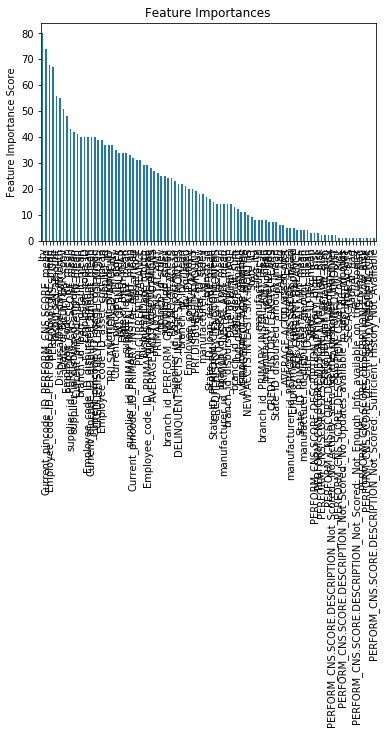

In [56]:
%%time
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
top_20_features = pd.Series(model1.get_booster().get_fscore()).sort_values(ascending=False)[:25]

In [ ]:
top_20_ft = list(top_20_features.index)

In [ ]:
top_20_ft

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.metrics import roc_curve, auc
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Performance(model1,y_validation,X_validation)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
%%time
np.linspace(0,1,11)

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='roc_auc',cv=5).mean()

param_space = {
    'learning_rate': hp.choice('learning_rate', [0.1,0.1]),#np.linspace(0,1,11)),
    
    'n_estimators': hp.choice('n_estimators', [300,300]),
    
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9]), #range(1,20)),
                               
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]), #range(1,7)),
    
    'gamma': hp.choice('gamma', [0,0]),#np.linspace(0,1,11)),
    
    'subsample': hp.choice('subsample', [0.8,0.8]),#np.linspace(0,1,11)),
    
    'colsample_bytree': hp.choice('colsample_bytree',[0.8,0.8])# np.linspace(0,1,11)),
    
#     'max_features': hp.choice('max_features', range(1,55)),
    
#     'criterion': hp.choice('criterion', ["gini", "entropy"])
#                        
     }

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=5, trials=trials)
print ('best:')
print (best)


In [57]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [60]:
%%time
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'mean_fit_time': array([ 45.37967043,  44.93024373,  44.10679684,  83.76554694,
        82.15233011,  80.35409398, 145.00305653, 139.94675436,
        99.89689574]), 'std_fit_time': array([ 0.19210073,  0.32886027,  1.05613563,  1.21314664,  0.83966623,
        0.90907717,  1.72734365,  0.97686123, 29.83450631]), 'mean_score_time': array([0.2406517 , 0.19833255, 0.2236064 , 0.20102949, 0.23576007,
       0.19190054, 0.24622092, 0.20152025, 0.16355977]), 'std_score_time': array([0.04627277, 0.03499582, 0.04406807, 0.03330652, 0.04104175,
       0.01327469, 0.02208765, 0.02943257, 0.03485512]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False],
      

In [62]:
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'mean_fit_time': array([ 45.14868565,  45.21200333,  43.69998231,  83.92551851,
        81.38507123,  80.60479994, 144.64127479, 138.95342746,
        99.7673481 ]), 'std_fit_time': array([ 0.3269354 ,  0.45307279,  0.71610326,  0.61766653,  0.48277546,
        0.96381784,  0.56272825,  0.49930138, 29.05432546]), 'mean_score_time': array([0.20277929, 0.22266493, 0.21884179, 0.19620438, 0.19781914,
       0.19020543, 0.24461169, 0.2269712 , 0.15418077]), 'std_score_time': array([0.04175352, 0.07087484, 0.03951036, 0.03527176, 0.02168644,
       0.01792149, 0.02651033, 0.04371199, 0.02215073]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False],
      

In [63]:
gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 5}

In [64]:
gsearch1.best_score_

0.672055660875796

In [66]:
param_test2 = {
 'max_depth':[4, 5, 6],
 'min_child_weight':[4,5,6]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

print(gsearch1.best_params_, gsearch1.best_score_)

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 6, 'min_child_weight': 5} 0.6725648594461321


In [67]:
param_test2b = {
 'min_child_weight':[5,6,7,8,9]
}

gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=118, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

print(gsearch2b.best_params_, gsearch2b.best_score_)

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'min_child_weight': 8} 0.6726510205201933


In [68]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_, gsearch3.best_score_)


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'gamma': 0.0} 0.6726510205201933


In [68]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=8,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

[0]	train-auc:0.638382+0.00237601	test-auc:0.626398+0.0018753
[1]	train-auc:0.651085+0.00213855	test-auc:0.636344+0.000860115
[2]	train-auc:0.656519+0.00169077	test-auc:0.640765+0.00171511
[3]	train-auc:0.659724+0.00111387	test-auc:0.64306+0.00148819
[4]	train-auc:0.662454+0.00156762	test-auc:0.644909+0.00147811
[5]	train-auc:0.664916+0.00158404	test-auc:0.646509+0.00142669
[6]	train-auc:0.666849+0.00121918	test-auc:0.647523+0.00137746
[7]	train-auc:0.668349+0.00105691	test-auc:0.648387+0.00137536
[8]	train-auc:0.669693+0.000998863	test-auc:0.649264+0.00110649
[9]	train-auc:0.670966+0.000794528	test-auc:0.64987+0.000921159
[10]	train-auc:0.672193+0.000791817	test-auc:0.650708+0.000867008
[11]	train-auc:0.673654+0.000885319	test-auc:0.651635+0.000784754
[12]	train-auc:0.675131+0.000655353	test-auc:0.652532+0.000770285
[13]	train-auc:0.676409+0.000612452	test-auc:0.653171+0.000694957
[14]	train-auc:0.677776+0.000428107	test-auc:0.653858+0.000987236
[15]	train-auc:0.678943+0.000497729	tes

[128]	train-auc:0.746986+0.00118264	test-auc:0.672285+0.00196003
[129]	train-auc:0.747266+0.00116986	test-auc:0.672283+0.00193377
[130]	train-auc:0.747519+0.00118222	test-auc:0.67227+0.00192063
[131]	train-auc:0.747874+0.001327	test-auc:0.672298+0.00190036
[132]	train-auc:0.748267+0.00115474	test-auc:0.672278+0.00192477
[133]	train-auc:0.74867+0.00111588	test-auc:0.672322+0.0019571
[134]	train-auc:0.749031+0.00114127	test-auc:0.672362+0.0019545
[135]	train-auc:0.749405+0.00102647	test-auc:0.67235+0.00193994
[136]	train-auc:0.749709+0.000996634	test-auc:0.672353+0.00194021
[137]	train-auc:0.749967+0.00103719	test-auc:0.67239+0.0019672
[138]	train-auc:0.750293+0.00104991	test-auc:0.672407+0.0019904
[139]	train-auc:0.750604+0.00110667	test-auc:0.6724+0.00198597
[140]	train-auc:0.750977+0.00121404	test-auc:0.6724+0.00202465
[141]	train-auc:0.751466+0.0012674	test-auc:0.672396+0.00202997
[142]	train-auc:0.751789+0.00126448	test-auc:0.672381+0.00204567
[143]	train-auc:0.752115+0.00125801	tes

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7846
AUC Score (Train): 0.676898


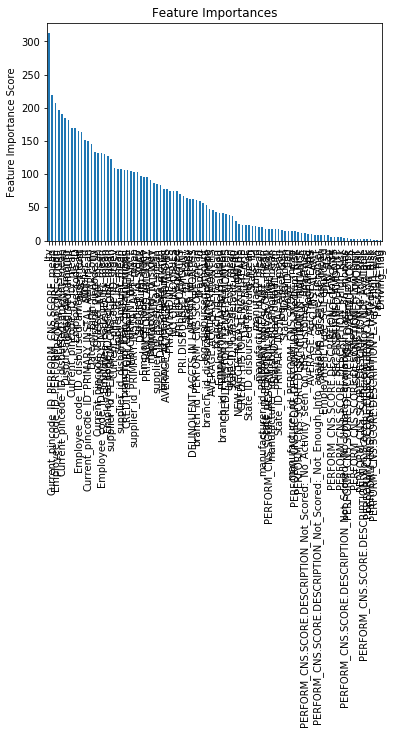

In [69]:
modelfit(xgb1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [53]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

print(gsearch4.best_params_, gsearch4.best_score_)


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'colsample_bytree': 0.7, 'subsample': 0.9} 0.6733562951759898


In [57]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(X_train,y_train)
print(gsearch5.best_params_, gsearch5.best_score_)


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'colsample_bytree': 0.7, 'subsample': 0.95} 0.6736259793369135


In [58]:
# param_test6 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }

# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
#  min_child_weight=8, gamma=0, subsample=0.95, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# gsearch6.fit(X_train,y_train)


# print(gsearch6.best_params_, gsearch6.best_score_)

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'reg_alpha': 1e-05} 0.6736259887264915


In [59]:
# param_test7 = {
#  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.09]
# }

# gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
#  min_child_weight=8, gamma=0.1,subsample=0.95, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
#  param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch7.fit(X_train,y_train)

# print(gsearch7.best_params_, gsearch7.best_score_)


/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'reg_alpha': 0} 0.6735705668923194


In [73]:
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=8,
 gamma=0,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)


[0]	train-auc:0.641044+0.00102676	test-auc:0.627981+0.00281759
[1]	train-auc:0.649599+0.00188012	test-auc:0.635125+0.00237959
[2]	train-auc:0.654455+0.00161769	test-auc:0.638625+0.00212048
[3]	train-auc:0.656957+0.00155937	test-auc:0.640714+0.0016168
[4]	train-auc:0.660045+0.00131354	test-auc:0.64236+0.00126039
[5]	train-auc:0.662808+0.000907502	test-auc:0.643841+0.00130584
[6]	train-auc:0.664286+0.000619887	test-auc:0.644885+0.00146297
[7]	train-auc:0.666409+0.00070704	test-auc:0.646173+0.00177108
[8]	train-auc:0.668139+0.000578035	test-auc:0.647405+0.00185577
[9]	train-auc:0.670159+0.000420486	test-auc:0.648775+0.0020101
[10]	train-auc:0.671761+0.0005422	test-auc:0.649621+0.00193704
[11]	train-auc:0.673297+0.000428784	test-auc:0.650614+0.00175678
[12]	train-auc:0.674758+0.00035596	test-auc:0.651418+0.00156005
[13]	train-auc:0.675976+0.000474503	test-auc:0.652219+0.00159193
[14]	train-auc:0.677221+0.000416195	test-auc:0.652705+0.00156201
[15]	train-auc:0.678467+0.000212558	test-auc:0.

[127]	train-auc:0.748668+0.000584025	test-auc:0.672195+0.00203064
[128]	train-auc:0.748937+0.000626723	test-auc:0.672238+0.00202106
[129]	train-auc:0.749245+0.000537484	test-auc:0.672255+0.00200208
[130]	train-auc:0.749628+0.000644704	test-auc:0.672272+0.00206171
[131]	train-auc:0.750071+0.000525392	test-auc:0.672209+0.00205257
[132]	train-auc:0.750314+0.000512504	test-auc:0.67221+0.00204024
[133]	train-auc:0.750629+0.000600788	test-auc:0.672182+0.0020418
[134]	train-auc:0.750919+0.000588353	test-auc:0.672226+0.00206235
[135]	train-auc:0.751285+0.000540275	test-auc:0.672241+0.00206912
[136]	train-auc:0.751756+0.000483264	test-auc:0.672238+0.00209045
[137]	train-auc:0.752086+0.000471621	test-auc:0.672233+0.00213113
[138]	train-auc:0.752371+0.00057003	test-auc:0.672204+0.00214141
[139]	train-auc:0.752689+0.000624765	test-auc:0.672234+0.0021788
[140]	train-auc:0.753053+0.000590022	test-auc:0.672234+0.00221798
[141]	train-auc:0.753495+0.000634152	test-auc:0.672225+0.00222004
[142]	train-au

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7846
AUC Score (Train): 0.676386


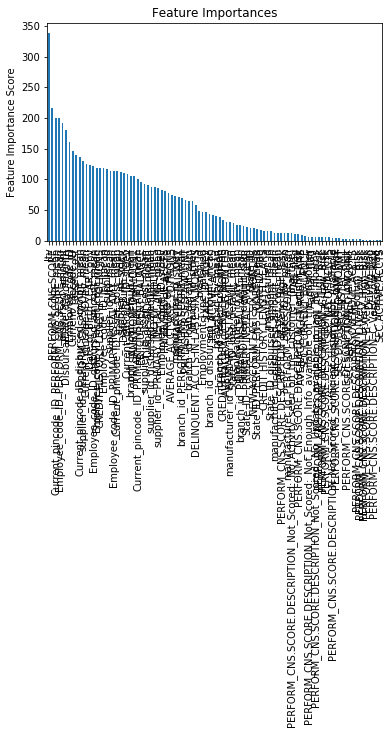

In [74]:
modelfit(xgb4, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)